In [1]:
import pandas as pd
import numpy as np

In [2]:
cust_acq = pd.read_csv("Customer Acqusition.csv")
spend = pd.read_csv("spend.csv")
repayment = pd.read_csv("Repayment.csv")


In [3]:
cust_acq.head(4)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt


In [4]:
spend.head(4)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47


In [5]:
repayment.head(4)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN


In [6]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [7]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [8]:
spend['Month'] = pd.to_datetime(spend.Month)

C:\Users\Kuldeep Ragadwal\AppData\Local\Temp\ipykernel_9044\1845207285.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend['Month'] = pd.to_datetime(spend.Month)


In [9]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73
1496,1497,A68,2006-03-25,BUS TICKET,204971.10
1497,1498,A69,2006-03-31,BUS TICKET,50449.44
1498,1499,A70,2006-03-23,BUS TICKET,80593.94


In [10]:
repayment.Month = pd.to_datetime(repayment.Month)

C:\Users\Kuldeep Ragadwal\AppData\Local\Temp\ipykernel_9044\675148317.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  repayment.Month = pd.to_datetime(repayment.Month)


In [11]:
repayment.dtypes

SL No:               float64
Customer              object
Month         datetime64[ns]
Amount               float64
Unnamed: 4           float64
dtype: object

In [12]:
repayment.columns

Index(['SL No:', 'Customer', 'Month', 'Amount', 'Unnamed: 4'], dtype='object')

In [13]:
repayment.drop('Unnamed: 4',axis = 1,inplace = True)

In [14]:
df1 = cust_acq.merge(spend,how = 'left', on = "Customer")

In [15]:
df1

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22


In [16]:
cust_data = df1.merge(repayment, how = 'left', on = 'Customer')

In [17]:
cust_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,NaN,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2.0,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,3.0,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,4.0,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,5.0,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,98.0,2004-01-25,310992.30
37280,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26,99.0,2004-01-12,121874.90
37281,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06,100.0,2004-01-03,337815.57
37282,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22,101.0,2004-01-15,25682.73


In [18]:
cust_data.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month_x', 'Type', 'Amount_x', 'SL No:', 'Month_y',
       'Amount_y'],
      dtype='object')

In [19]:
cust_data.drop(['No','Sl No:','SL No:'], axis = 1, inplace=True)

In [20]:
cust_data

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30
37280,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26,2004-01-12,121874.90
37281,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,2004-01-03,337815.57
37282,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,2004-01-15,25682.73


In [21]:
cust_data.rename(columns= {'Month_x':"Spend_Month", 'Amount_x': 'Spend_Amount', 'Month_y':'Repayment_Month','Amount_y':'Repayment_Amount'}, inplace= True)

In [22]:
cust_data

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repayment_Month,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30
37280,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26,2004-01-12,121874.90
37281,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,2004-01-03,337815.57
37282,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,2004-01-15,25682.73


## **1. In the above dataset,**

### **a. In case age is less than 18, replace it with mean of age values.**

In [23]:
cust_data['Age'] = np.where(cust_data.Age<18,cust_data.Age.mean(),cust_data.Age)

###  **b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.**
### **(customer’s limit provided in acquisition table is the per transaction limit on his card)**

In [24]:
cust_data['Spend_Amount'] = np.where (cust_data.Spend_Amount>cust_data.Limit,cust_data.Limit*0.5,cust_data.Spend_Amount)

### **c. Incase the repayment amount is more than the limit, replace the repayment with the limit.**

In [25]:
cust_data['Repayment_Amount'] = np.where (cust_data.Repayment_Amount>cust_data.Limit,cust_data.Limit,cust_data.Repayment_Amount)

### **2. From the above dataset create the following summaries:**

### **a. How many distinct customers exist?**

In [26]:
dist_cust_count = cust_data.Customer.nunique()
print('The number of distinct customer =', dist_cust_count)

The number of distinct customer = 100


### **b. How many distinct categories exist?**`

In [27]:
dist_cat_count = cust_data.Product.nunique()
print('The number of distinct categories =', dist_cat_count)

The number of distinct categories = 3


### **c. What is the average monthly spend by customers?**

In [28]:
import datetime as dt

In [29]:
avg_monthly_spend = cust_data.groupby(cust_data.Spend_Month.dt.month_name())['Spend_Amount'].mean().sort_values(ascending=False)

In [30]:
avg_monthly_spend

Spend_Month
June         185539.517389
July         172496.044621
August       171892.475911
May          161558.548503
February     159385.148924
January      155942.996660
November     155925.316561
September    154158.225561
October      142427.170070
April        138957.484445
March        138588.307050
December     114736.237214
Name: Spend_Amount, dtype: float64

### **d. What is the average monthly repayment by customers?**

In [31]:
avg_monthly_repayment = cust_data.groupby(cust_data.Repayment_Month.dt.month_name())['Repayment_Amount'].mean().sort_values(ascending=False)
avg_monthly_repayment

Repayment_Month
December     200137.983477
May          194271.467485
July         184579.327064
October      182892.193858
April        171751.826384
January      168675.745954
August       167324.070032
February     166728.011417
March        160361.672881
November     158510.801691
September    138239.376516
June         117505.962450
Name: Repayment_Amount, dtype: float64

 ### **e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?** 
### **(Profit is defined as interest earned on Monthly Profit.**
### **Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amount.**

In [32]:
diff_btwn_mnthly_rev_spend = cust_data.groupby(cust_data.Repayment_Month.dt.month_name())['Repayment_Amount'].sum() - cust_data.groupby(cust_data.Spend_Month.dt.month_name())['Spend_Amount'].sum()

In [33]:
profit_per_month = diff_btwn_mnthly_rev_spend.reset_index()

In [34]:
profit_per_month.columns

Index(['Repayment_Month', 0], dtype='object')

In [35]:
profit_per_month['Monthly_profit'] = profit_per_month.iloc[::,1]

In [36]:
profit_per_month.drop(0,axis=1, inplace = True)

In [37]:
profit_per_month['Monthly Interest'] = np.where(profit_per_month.Monthly_profit>0,profit_per_month.Monthly_profit*0.029,0)

In [38]:
profit_per_month

,Repayment_Month,Monthly_profit,Monthly Interest
0,April,1.320211e+08,3.828611e+06
1,August,2.041715e+07,5.920973e+05
2,December,4.009531e+07,1.162764e+06
3,February,8.801559e+06,2.552452e+05
4,January,1.167286e+07,3.385130e+05
5,July,1.997481e+07,5.792695e+05
6,June,-1.381064e+08,0.000000e+00
7,March,4.659299e+07,1.351197e+06
8,May,4.603768e+08,1.335093e+07
9,November,1.665356e+07,4.829531e+05


### **f. What are the top 5 product types?**

In [39]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73
1496,1497,A68,2006-03-25,BUS TICKET,204971.10
1497,1498,A69,2006-03-31,BUS TICKET,50449.44
1498,1499,A70,2006-03-23,BUS TICKET,80593.94


In [40]:
top5_products =  cust_data.groupby('Type')['Spend_Amount'].sum().sort_values(ascending=False).head(5)
top5_products

print("The top 5 product types based on amont spend are: ", top5_products.index)

The top 5 product types based on amont spend are:  Index(['CAMERA', 'PETRO', 'FOOD', 'AIR TICKET', 'TRAIN TICKET'], dtype='object', name='Type')


 ### **g. Which city is having maximum spend?**

In [41]:
city_with_max_spend = cust_data.groupby('City')['Spend_Amount'].sum().sort_values(ascending=False).head(1)
city_with_max_spend

City
COCHIN    1.175903e+09
Name: Spend_Amount, dtype: float64

 ### **h. Which age group is spending more money?**

In [42]:
cust_data['Age_group'] = pd.qcut(cust_data.Age,6)

In [43]:
spend_by_age_group =  cust_data.groupby('Age_group')['Spend_Amount'].sum().sort_values(ascending=False).astype(int)
spend_by_age_group

Age_group
(18.999, 28.0]    1329893830
(43.249, 51.0]    1280617564
(36.0, 43.249]    1176025665
(61.0, 79.0]       937073661
(28.0, 36.0]       597523036
(51.0, 61.0]       426853877
Name: Spend_Amount, dtype: int32

In [44]:
# for max spending age group
spend_by_age_group.head(1)

Age_group
(18.999, 28.0]    1329893830
Name: Spend_Amount, dtype: int32

### **i. Who are the top 10 customers in terms of repayment?**

In [45]:
top_10_cust = cust_data.groupby('Customer')['Repayment_Amount'].sum().sort_values(ascending=False).head(10).astype(int)
top_10_cust

Customer
A61    400487430
A60    375299048
A13    296732020
A43    263186015
A45    261898380
A12    258377564
A14    246241327
A44    240086633
A39    236296982
A42    236079286
Name: Repayment_Amount, dtype: int32

### **3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.**

In [46]:
cust_data['Spend_Year'] = cust_data.Spend_Month.dt.year

In [47]:
city_yearly_spend = cust_data.groupby(['City','Spend_Year','Product'])['Spend_Amount'].sum()

city_yearly_spend =city_yearly_spend.reset_index()

In [48]:
city_yearly_spend

,City,Spend_Year,Product,Spend_Amount
0,BANGALORE,2004,Gold,2.480069e+08
1,BANGALORE,2004,Platimum,2.942657e+07
2,BANGALORE,2004,Silver,2.845089e+07
3,BANGALORE,2005,Gold,3.570769e+08
4,BANGALORE,2005,Platimum,2.242526e+07
...,...,...,...,...
67,TRIVANDRUM,2005,Platimum,1.116447e+08
68,TRIVANDRUM,2005,Silver,5.128347e+06
69,TRIVANDRUM,2006,Gold,7.386419e+07
70,TRIVANDRUM,2006,Platimum,6.656952e+07


C:\Users\Kuldeep Ragadwal\AppData\Local\Temp\ipykernel_9044\401474865.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=city_yearly_spend, x='City', y='Spend_Amount', hue='Product', ci=None)


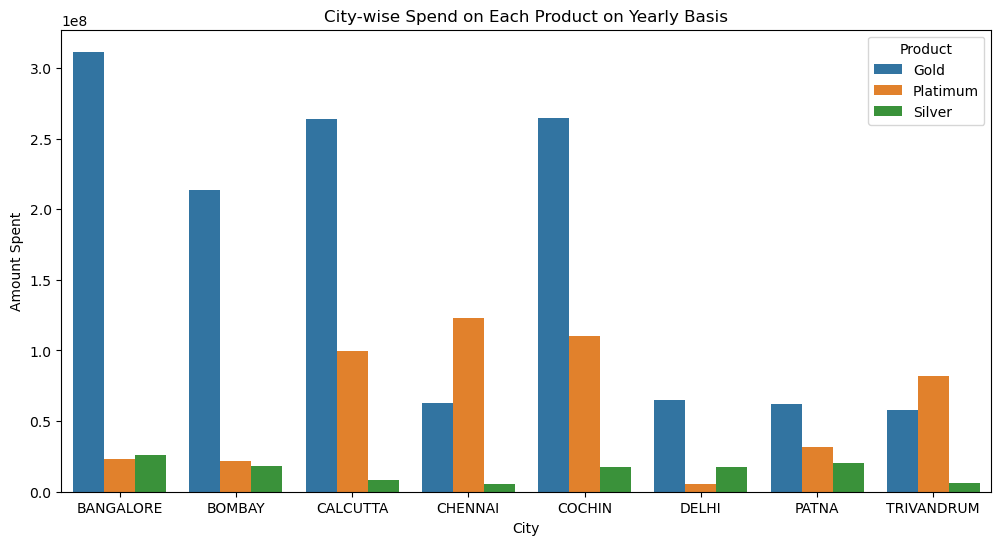

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=city_yearly_spend, x='City', y='Spend_Amount', hue='Product', ci=None)
plt.title('City-wise Spend on Each Product on Yearly Basis')
plt.xlabel('City')
plt.ylabel('Amount Spent')
plt.show()

 ### **4. Create graphs for**
 ### **a. Monthly comparison of total spends, city wise**

In [50]:
cust_data['Month_spd'] = cust_data.Spend_Month.dt.month_name()

In [51]:
city_month_comparision = cust_data.groupby(['City','Month_spd'])['Spend_Amount'].sum().reset_index()

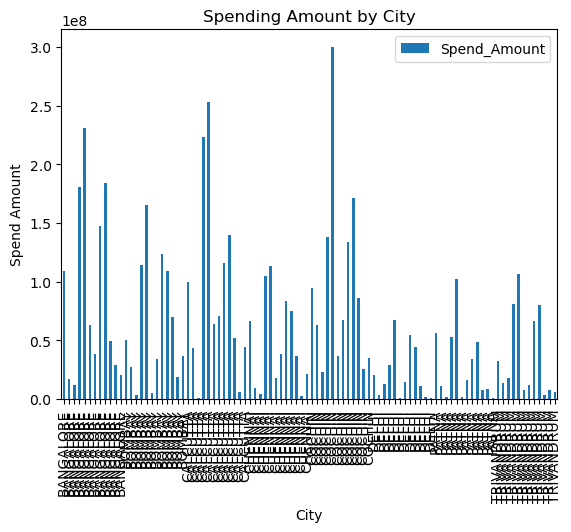

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns: 'City', 'Month_spd', 'Spend_Amount'

# Bar chart for Spending Amount by City
city_month_comparision.plot(kind='bar', x='City', y='Spend_Amount')
plt.title('Spending Amount by City')
plt.xlabel('City')
plt.ylabel('Spend Amount')
plt.show()

 ### **b. Comparison of yearly spend on air tickets**

In [53]:
cust_data

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repayment_Month,Repayment_Amount,Age_group,Spend_Year,Month_spd
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,"(61.0, 79.0]",2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,"(61.0, 79.0]",2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,"(61.0, 79.0]",2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,"(61.0, 79.0]",2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,"(61.0, 79.0]",2004,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,100000.00,"(51.0, 61.0]",2004,January
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,2004-01-12,10000.00,"(51.0, 61.0]",2004,January
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,2004-01-03,10001.00,"(43.249, 51.0]",2004,January
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,2004-01-15,10002.00,"(28.0, 36.0]",2004,January


In [54]:
df1 = cust_data.loc[cust_data.Type == "AIR TICKET"]

In [57]:
air_ticket_spend = df1.groupby('Spend_Year')["Spend_Amount"].sum()
air_ticket_spend

Spend_Year
2004    1.126823e+08
2005    2.878031e+08
2006    1.396326e+08
Name: Spend_Amount, dtype: float64

Text(0, 0.5, 'Total Spending')

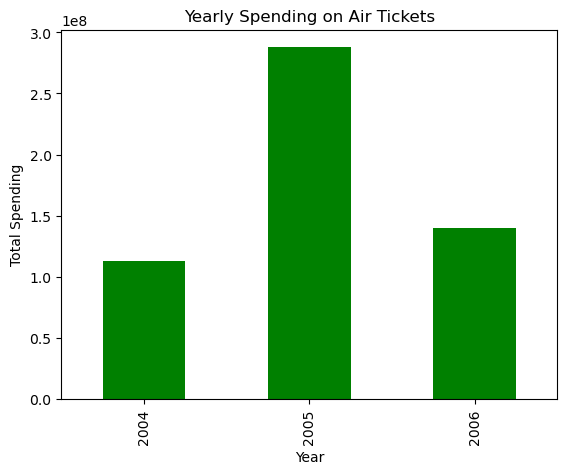

In [59]:
air_ticket_spend.plot(kind='bar', color = 'green')
plt.title('Yearly Spending on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spending')

 ### **c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)**

<Figure size 1200x800 with 0 Axes>

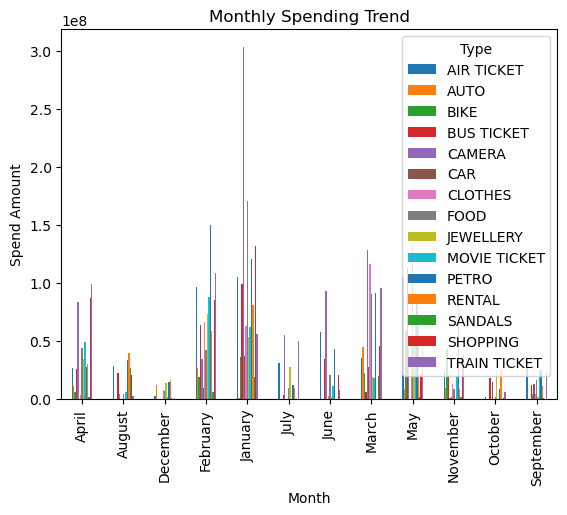

In [69]:
monthly_trend = pd.pivot_table(data=cust_data,index=cust_data.Spend_Month.dt.month_name(), columns='Type',values='Spend_Amount',aggfunc='sum')
plt.figure(figsize=(12, 8))  # Increase the figure size (width, height) in inches

monthly_trend.plot(kind='bar')
plt.title('Monthly Spending Trend')
plt.xlabel('Month')
plt.ylabel('Spend Amount')
plt.show()
